<a href="https://colab.research.google.com/github/sriharisivashanmugam/BlowerFault/blob/main/Blower_Fault_v2_Jan_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For every heater, regardless of period of data available, do feature engineering, normalize them temporally by period of data available and have 2 clusters faulty/non-fauly, analyze the two clusters for significant differences and try predicting new heaters in the clusters.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [3]:
def had_fault(data):
  if 'E1.0' in set(data['ErrorCode']):
    return True
  else:
    return False

def number_of_unique_faults(data):
  data['lag_error'] = data['ErrorCode'].shift(-1)
  return data[(data['ErrorCode']=='E1.0') & (data['lag_error']!='E1.0')].shape[0]

def get_stats(data):
  mean_pwm = temp['BlowerPWM'].mean()
  mean_rpm = temp['BlowerRPM'].mean()
  mean_fr = temp['FiringRate'].mean()
  mean_ft = temp['FlueTemperature'].mean()
  max_pwm = temp['BlowerPWM'].max()
  max_rpm = temp['BlowerRPM'].max()
  max_fr = temp['FiringRate'].max()
  max_ft = temp['FlueTemperature'].max()

  return mean_pwm,mean_rpm,mean_fr,mean_ft,max_pwm,max_rpm,max_fr,max_ft

def get_agg(data):
  pass


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Predictive Models/Blower Fault/1001s with blower fault/iQ100101051864_HEX_1.csv')

In [5]:
df[['BlowerPWM','BlowerRPM','FiringRate','FlueTemperature']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BlowerPWM,320532.0,246.848059,97.455914,0.0,182.0,264.0,342.0,450.0
BlowerRPM,320532.0,6372.928990,2188.168560,0.0,5200.0,7005.0,8286.0,8762.0
FiringRate,320532.0,6.826835,19.547247,0.0,0.0,0.0,0.0,251.0
FlueTemperature,320532.0,105.264666,5.166989,59.0,103.0,105.0,107.0,133.0


In [6]:
new_df = {'HEX':[],'mean_pwm':[],'mean_rpm':[],'mean_fr':[],'mean_ft':[],'max_pwm':[],'max_rpm':[],'max_fr':[],'max_ft':[],'had_fault':[]}
for i in os.listdir('/content/drive/MyDrive/Predictive Models/Blower Fault Phase 2/Hex_with_blowerFault/'):
  temp = pd.read_csv('/content/drive/MyDrive/Predictive Models/Blower Fault Phase 2/Hex_with_blowerFault/'+i)
  temp = temp[['BlowerPWM','BlowerRPM','FiringRate','FlueTemperature','ErrorCode']]

  new_df['HEX'].append(i.split('.')[0])
  res = get_stats(temp)
  print(i,had_fault(temp),number_of_unique_faults(temp),res)
  new_df['mean_pwm'].append(res[0])
  new_df['mean_rpm'].append(res[1])
  new_df['mean_fr'].append(res[2])
  new_df['mean_ft'].append(res[3])
  new_df['max_pwm'].append(res[4])
  new_df['max_rpm'].append(res[5])
  new_df['max_fr'].append(res[6])
  new_df['max_ft'].append(res[7])
  new_df['had_fault'].append(had_fault(temp))

iQ100110241866_HEX_1.csv False 0 (149.37351255837436, 4469.897092010602, 18.121125836173167, 93.0624763347217, 450.0, 9315.0, 251.0, 142.0)
iQ100110241866_HEX_2.csv True 1 (170.410034170656, 5030.215420364834, 26.921365310417396, 95.08819975173525, 450.0, 9270.0, 254.0, 139.0)
iQ100110241866_HEX_3.csv True 12 (142.10237718191127, 4194.812611625747, 24.79113483199581, 96.40760960160027, 450.0, 9298.0, 251.0, 137.0)
iQ100110241866_HEX_4.csv True 15 (157.18819578896418, 4627.496858865763, 33.90983964040729, 98.19666626331075, 450.0, 9314.0, 254.0, 155.0)
iQ100101021861_HEX_1.csv False 0 (246.37069383794275, 6826.199518841986, 3.914341743490215, 109.71846191169335, 346.0, 8332.0, 91.0, 119.0)
iQ100101021861_HEX_2.csv False 0 (311.53567420814477, 7677.162027149321, 0.31236199095022626, 108.93227149321267, 355.0, 8335.0, 76.0, 117.0)
iQ100101021861_HEX_3.csv False 0 (312.42767421996683, 7649.6372908606745, 0.46651258604230517, 109.26197055720243, 352.0, 8328.0, 85.0, 119.0)
iQ100101021861_HE

In [7]:
new_df = pd.DataFrame(new_df)
new_df

,HEX,mean_pwm,mean_rpm,mean_fr,mean_ft,max_pwm,max_rpm,max_fr,max_ft,had_fault
0,iQ100110241866_HEX_1,149.373513,4469.897092,18.121126,93.062476,450.0,9315.0,251.0,142.0,False
1,iQ100110241866_HEX_2,170.410034,5030.215420,26.921365,95.088200,450.0,9270.0,254.0,139.0,True
2,iQ100110241866_HEX_3,142.102377,4194.812612,24.791135,96.407610,450.0,9298.0,251.0,137.0,True
3,iQ100110241866_HEX_4,157.188196,4627.496859,33.909840,98.196666,450.0,9314.0,254.0,155.0,True
4,iQ100101021861_HEX_1,246.370694,6826.199519,3.914342,109.718462,346.0,8332.0,91.0,119.0,False
5,iQ100101021861_HEX_2,311.535674,7677.162027,0.312362,108.932271,355.0,8335.0,76.0,117.0,False
6,iQ100101021861_HEX_3,312.427674,7649.637291,0.466513,109.261971,352.0,8328.0,85.0,119.0,False
7,iQ100101021861_HEX_4,316.604897,7788.624666,0.254323,110.581473,352.0,8332.0,85.0,119.0,False
8,iQ100101081865_HEX_1,189.576854,5253.376867,21.845122,104.485488,350.0,9425.0,244.0,144.0,True
9,iQ100101081865_HEX_2,190.991721,5558.196134,28.359846,101.746046,350.0,8332.0,251.0,136.0,False


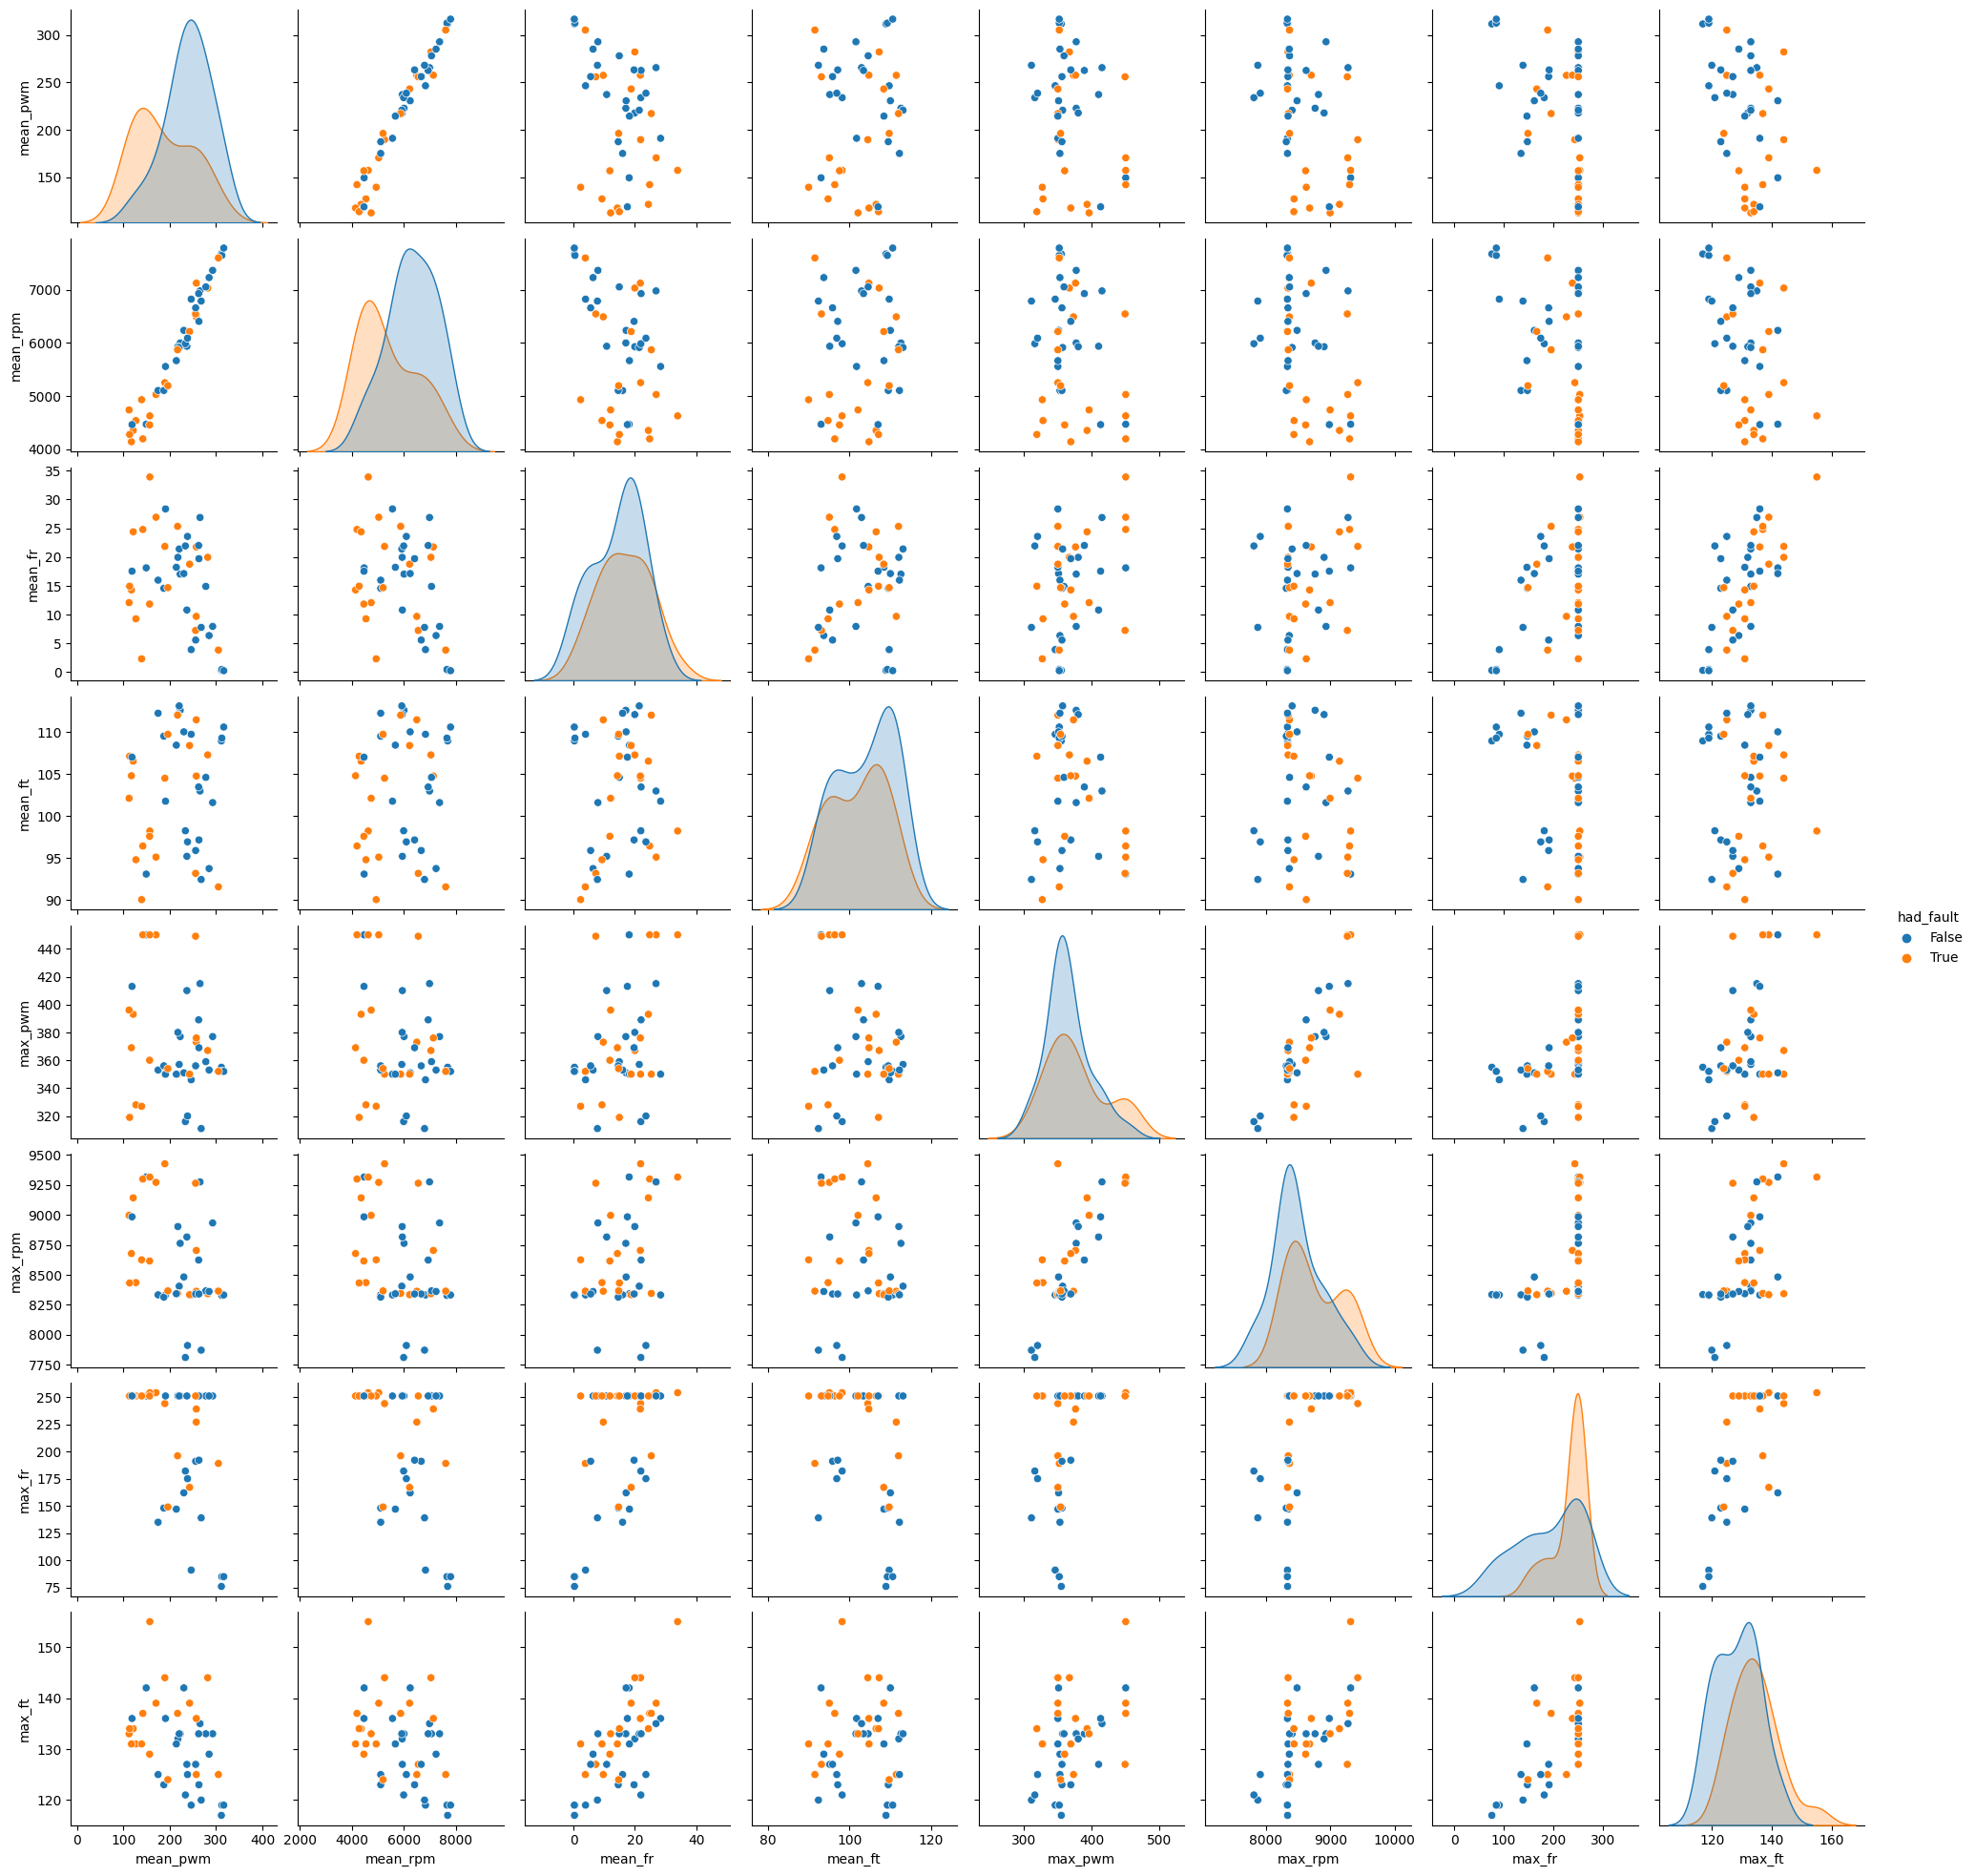

In [8]:
sns.pairplot(new_df,hue='had_fault')

In [9]:
# pip install pycaret

In [10]:
from pycaret.classification import *
s = setup(new_df, target = 'had_fault', session_id = 123)

,Description,Value
0,Session id,123
1,Target,had_fault
2,Target type,Binary
3,Original data shape,"(44, 10)"
4,Transformed data shape,"(44, 10)"
5,Transformed train set shape,"(30, 10)"
6,Transformed test set shape,"(14, 10)"
7,Numeric features,8
8,Categorical features,1
9,Preprocess,True


In [12]:
best = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.6333,0.0000,0.6000,0.4500,0.4967,0.2100,0.2000,0.1110
knn,K Neighbors Classifier,0.5333,0.6250,0.4000,0.4000,0.3667,0.0500,0.0500,0.1540
ridge,Ridge Classifier,0.5667,0.0000,0.4000,0.4500,0.4000,0.0900,0.1000,0.2350
et,Extra Trees Classifier,0.4667,0.5000,0.4000,0.3000,0.3167,-0.0700,-0.0500,0.1980
lr,Logistic Regression,0.4667,0.3500,0.3500,0.4000,0.3500,-0.0900,-0.1000,0.1690
nb,Naive Bayes,0.5667,0.5500,0.3500,0.5000,0.4000,0.0900,0.1000,0.1040
qda,Quadratic Discriminant Analysis,0.6667,0.0000,0.3000,0.2000,0.2400,0.0000,0.0000,0.0670
dt,Decision Tree Classifier,0.5667,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1200
rf,Random Forest Classifier,0.5667,0.5500,0.0000,0.0000,0.0000,0.0000,0.0000,0.3970
ada,Ada Boost Classifier,0.5667,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0660


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

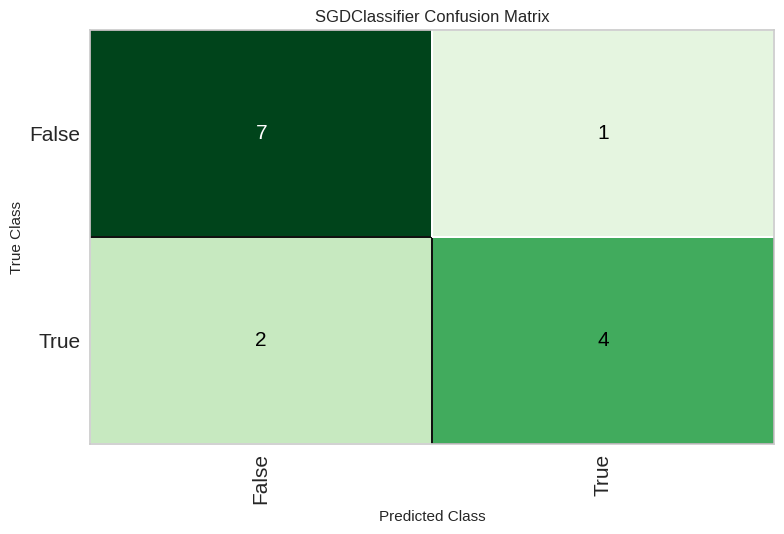

In [14]:
plot_model(best, plot = 'confusion_matrix')

In [17]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7857,0.7708,0.6667,0.8000,0.7273,0.5532,0.5594


,HEX,mean_pwm,mean_rpm,mean_fr,mean_ft,max_pwm,max_rpm,max_fr,max_ft,had_fault,prediction_label
23,iQ100106081845_HEX_4,242.987808,6216.383301,18.764977,108.382454,350.0,8334.0,167.0,139.0,True,0
4,iQ100101021861_HEX_1,246.370697,6826.199707,3.914342,109.718460,346.0,8332.0,91.0,119.0,False,0
35,iQ100104202108_HEX_4,238.492645,6091.265625,23.583185,96.902313,320.0,7911.0,175.0,125.0,False,0
5,iQ100101021861_HEX_2,311.535675,7677.162109,0.312362,108.932274,355.0,8335.0,76.0,117.0,False,0
39,iQ100104051807_HEX_4,139.402039,4931.873535,2.317666,90.021423,327.0,8625.0,251.0,131.0,True,1
28,iQ100108151811_HEX_1,175.013718,5106.114746,15.984619,112.230118,353.0,8333.0,135.0,125.0,False,1
21,iQ100106081845_HEX_2,230.557922,6238.236816,17.128477,110.010506,351.0,8482.0,162.0,142.0,False,0
20,iQ100106081845_HEX_1,217.041656,5872.157715,25.329458,111.998695,350.0,8345.0,196.0,137.0,True,0
3,iQ100110241866_HEX_4,157.188202,4627.497070,33.909840,98.196663,450.0,9314.0,254.0,155.0,True,1
14,iQ100101051864_HEX_3,220.575974,5916.275391,21.403172,113.099800,357.0,8405.0,251.0,133.0,False,0


In [18]:
save_model(best, 'model_1.1_BF')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['mean_pwm', 'mean_rpm', 'mean_fr',
                                              'mean_ft', 'max_pwm', 'max_rpm',
                                              'max_fr', 'max_ft'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('cat...
                 ('trained_model',
   